# Prediksi nasabah yang mungkin akan membeli deposito

**Background :** Dalam industri perbankan, memahami perilaku, nasabah sangat krusial untuk meningkatkan efektivitas kampanye pemasaran. Salah satu tantangan terbesar adalah mengetahui siapa saja yang berpotensi merespons positif terhadap penawaran produk keuangan tertentu, seperti deposito berjangka.

Dengan memanfaatkan data historis yang mencakup informasi demografis nasabah, riwayat transaksi, serta hasil kampanye sebelumnya, peserta

## 🛠 Tujuan:
Membuat model machine learning yang dapat mengklasifikasikan nasabah ke dalam dua kategori:

● 1: nasabah diprediksi akan membeli deposito berjangka

● 0: nasabah diprediksi tidak akan membeli

**Nama Kolom  : Deskripsi Kolom**

**customer_number :** Angka unik yang diberikan kepada setiap nasabah untuk membedakan satu nasabah
dengan yang lainnya

**usia :** Usia nasabah (dalam tahun)

**pekerjaan :** Jenis pekerjaan nasabah

**status_perkawinan :**  Status perkawinan nasabah (termasuk duda/janda sebagai "cerai")

**pendidikan :** Tingkat pendidikan terakhir yang diselesaikan oleh nasabah

**gagal_bayar_sebelumnya :** Apakah nasabah pernah mengalami gagal bayar kredit sebelumnya

**pinjaman_rumah :** Apakah nasabah memiliki pinjaman rumah

**pinjaman_pribadi :** Apakah nasabah memiliki pinjaman pribadi

**jenis_kontak :** Jenis media komunikasi yang digunakan untuk menghubungi nasabah

**bulan_kontak_terakhir :** Bulan ketika nasabah terakhir kali dihubungi

**hari_kontak_terakhir :** Hari dalam seminggu ketika nasabah terakhir kali dihubungi

**durasi_kontak :** Durasi kontak terakhir dalam satuan detik (tidak digunakan dalam model prediksi nyata karena hanya diketahui setelah kontak dilakukan)

**jumlah_kontak_kampanye_ini :** Jumlah total kontak yang dilakukan selama kampanye saat ini

**hari_sejak_kontak_sebelumnya :** Jumlah hari sejak nasabah terakhir dihubungi dari kampanye sebelumnya (999 berarti
belum pernah dihubungi sebelumnya)

**jumlah_kontak_sebelumnya :** Jumlah kontak yang dilakukan sebelum kampanye saat ini terhadap nasabah

**hasil_kampanye_sebelumnya :** Hasil dari kampanye pemasaran sebelumnya terhadap nasabah

**tingkat_variasi_pekerjaan :** Indikator variasi tingkat pekerjaan secara kuartalan

**indeks_harga_konsumen :** Indeks harga konsumen pada bulan terkait

**indeks_kepercayaan_konsumen :** Indeks tingkat kepercayaan konsumen pada bulan terkait

**suku_bunga_euribor_3bln :**  Suku bunga Euribor untuk tenor 3 bulan

**jumlah_pekerja :** Jumlah total tenaga kerja dalam indikator kuartalan

**berlangganan_deposito :** Apakah nasabah memutuskan untuk berlangganan produk deposito berjangka (1 berarti berlangganan deposito dan 0 berarti customer tidak berlangganan deposito)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, precision_recall_fscore_support, f1_score, RocCurveDisplay, precision_score, confusion_matrix, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
train_data = pd.read_csv("training_dataset.csv")
train_data

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,680377,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,505429,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0
22913,308952,29,manajer,lajang,SMA,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,NTT,0
22914,865813,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,NTB,0


In [4]:
train_data["pekerjaan"].unique()

array(['sosial media specialis', 'teknisi', 'pekerja kasar', 'manajer',
       'asisten rumah tangga', 'mahasiswa', 'penyedia jasa',
       'pemilik bisnis', 'entrepreneur', 'pengangguran', 'pensiunan',
       'unknown'], dtype=object)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [6]:
train_data.describe()

,customer_number,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
count,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000
mean,550930.993193,40.016233,2.561878,962.210377,0.170143,0.077915,93.576541,-40.485717,3.617890,5166.773124,0.114069
std,259909.889175,10.438059,2.794178,187.566774,0.490611,1.576176,0.580586,4.641091,1.737591,72.479698,0.317902
min,100108.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,325755.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,553139.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,777157.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,999997.000000,98.000000,42.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
train_data.isna().sum()

,0
customer_number,0
usia,0
pekerjaan,0
status_perkawinan,0
pendidikan,0
gagal_bayar_sebelumnya,0
pinjaman_rumah,0
pinjaman_pribadi,0
jenis_kontak,0
bulan_kontak_terakhir,0


In [8]:
(train_data == "").sum()

,0
customer_number,0
usia,0
pekerjaan,0
status_perkawinan,0
pendidikan,0
gagal_bayar_sebelumnya,0
pinjaman_rumah,0
pinjaman_pribadi,0
jenis_kontak,0
bulan_kontak_terakhir,0


In [9]:
(train_data == "unknown").sum()

,0
customer_number,0
usia,0
pekerjaan,193
status_perkawinan,47
pendidikan,992
gagal_bayar_sebelumnya,4745
pinjaman_rumah,579
pinjaman_pribadi,579
jenis_kontak,0
bulan_kontak_terakhir,0


In [10]:
train_data["berlangganan_deposito"].value_counts()

,count
berlangganan_deposito,
0,20302
1,2614


In [11]:
train_data = train_data.drop("customer_number", axis=1)
train_data

,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,wed,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,tue,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0
22913,29,manajer,lajang,SMA,no,yes,no,cellular,jul,wed,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,NTT,0
22914,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,mon,...,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,NTB,0


In [12]:
all_col = [col for col in train_data.columns]
train_data = train_data[train_data[all_col] != "unknown"]
train_data

,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,wed,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,tue,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0
22913,29,manajer,lajang,SMA,no,yes,no,cellular,jul,wed,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,NTT,0
22914,52,entrepreneur,menikah,Tidak Tamat SD,NaN,yes,no,telephone,jun,mon,...,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,NTB,0


In [13]:
train_data = train_data.dropna()
train_data

,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22908,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,NTT,0
22910,30,mahasiswa,lajang,Diploma,no,no,no,cellular,sep,mon,...,9,2,failure,-1.1,94.199,-37.5,0.879,4963.6,Bali,0
22911,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,wed,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,tue,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0


In [14]:
X = train_data.drop("berlangganan_deposito", axis=1)
y = train_data["berlangganan_deposito"]

len(X), len(y)

(16948, 16948)

In [15]:
num_col = [col for col, data in X.items() if pd.api.types.is_integer_dtype(data) or pd.api.types.is_float_dtype(data)]

min_max = MinMaxScaler()
X_transformed_num = min_max.fit_transform(X[num_col])
X_transformed_num = pd.DataFrame(X_transformed_num,
                 columns=min_max.get_feature_names_out(),
                 index=X.index)
X_transformed_num

,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja
0,0.589744,0.02439,1.000000,0.000000,0.354167,0.784879,0.439331,0.056903,0.105860
1,0.333333,0.02439,1.000000,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883
2,0.153846,0.00000,1.000000,0.000000,1.000000,0.669135,0.338912,0.980277,1.000000
3,0.294872,0.02439,1.000000,0.000000,0.937500,0.698753,0.602510,0.957833,0.859735
4,0.294872,0.04878,1.000000,0.000000,1.000000,0.484412,0.615063,0.981637,1.000000
...,...,...,...,...,...,...,...,...,...
22908,0.153846,0.00000,1.000000,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000
22910,0.166667,0.02439,0.009009,0.285714,0.479167,0.778644,0.556485,0.055543,0.000000
22911,0.192308,0.02439,1.000000,0.000000,1.000000,0.484412,0.615063,0.982317,1.000000
22912,0.166667,0.02439,1.000000,0.000000,0.479167,0.778644,0.556485,0.055770,0.000000


In [16]:
X = X.drop(num_col, axis=1)
X = X.join(X_transformed_num)
X

,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,hasil_kampanye_sebelumnya,pulau,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja
0,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,fri,nonexistent,Papua,0.589744,0.02439,1.000000,0.000000,0.354167,0.784879,0.439331,0.056903,0.105860
1,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,fri,nonexistent,Sulawesi,0.333333,0.02439,1.000000,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883
2,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,thu,nonexistent,Papua,0.153846,0.00000,1.000000,0.000000,1.000000,0.669135,0.338912,0.980277,1.000000
3,pekerja kasar,menikah,SMA,no,no,no,telephone,may,wed,nonexistent,Sumatera,0.294872,0.02439,1.000000,0.000000,0.937500,0.698753,0.602510,0.957833,0.859735
4,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,wed,nonexistent,Bali,0.294872,0.04878,1.000000,0.000000,1.000000,0.484412,0.615063,0.981637,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22908,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,aug,fri,nonexistent,NTT,0.153846,0.00000,1.000000,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000
22910,mahasiswa,lajang,Diploma,no,no,no,cellular,sep,mon,failure,Bali,0.166667,0.02439,0.009009,0.285714,0.479167,0.778644,0.556485,0.055543,0.000000
22911,teknisi,menikah,Diploma,no,yes,no,cellular,aug,wed,nonexistent,Kalimantan,0.192308,0.02439,1.000000,0.000000,1.000000,0.484412,0.615063,0.982317,1.000000
22912,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,tue,nonexistent,Bali,0.166667,0.02439,1.000000,0.000000,0.479167,0.778644,0.556485,0.055770,0.000000


In [17]:
cat_col = [col for col, data in X.items() if pd.api.types.is_object_dtype(data)]

one_hot = OneHotEncoder(sparse_output=False)

X_transformed_cat= one_hot.fit_transform(X[cat_col])
X_transformed_cat= pd.DataFrame(X_transformed_cat,
                             columns=one_hot.get_feature_names_out(),
                             index=X.index)
X_transformed_cat

,pekerjaan_asisten rumah tangga,pekerjaan_entrepreneur,pekerjaan_mahasiswa,pekerjaan_manajer,pekerjaan_pekerja kasar,pekerjaan_pemilik bisnis,pekerjaan_pengangguran,pekerjaan_pensiunan,pekerjaan_penyedia jasa,pekerjaan_sosial media specialis,...,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success,pulau_Bali,pulau_Jawa,pulau_Kalimantan,pulau_NTB,pulau_NTT,pulau_Papua,pulau_Sulawesi,pulau_Sumatera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22910,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22912,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X = X.drop(cat_col, axis=1)
X = X.join(X_transformed_cat)
X

,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pekerjaan_asisten rumah tangga,...,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success,pulau_Bali,pulau_Jawa,pulau_Kalimantan,pulau_NTB,pulau_NTT,pulau_Papua,pulau_Sulawesi,pulau_Sumatera
0,0.589744,0.02439,1.000000,0.000000,0.354167,0.784879,0.439331,0.056903,0.105860,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.333333,0.02439,1.000000,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.153846,0.00000,1.000000,0.000000,1.000000,0.669135,0.338912,0.980277,1.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.294872,0.02439,1.000000,0.000000,0.937500,0.698753,0.602510,0.957833,0.859735,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.294872,0.04878,1.000000,0.000000,1.000000,0.484412,0.615063,0.981637,1.000000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22908,0.153846,0.00000,1.000000,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22910,0.166667,0.02439,0.009009,0.285714,0.479167,0.778644,0.556485,0.055543,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22911,0.192308,0.02439,1.000000,0.000000,1.000000,0.484412,0.615063,0.982317,1.000000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22912,0.166667,0.02439,1.000000,0.000000,0.479167,0.778644,0.556485,0.055770,0.000000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Matriks Korelasi')

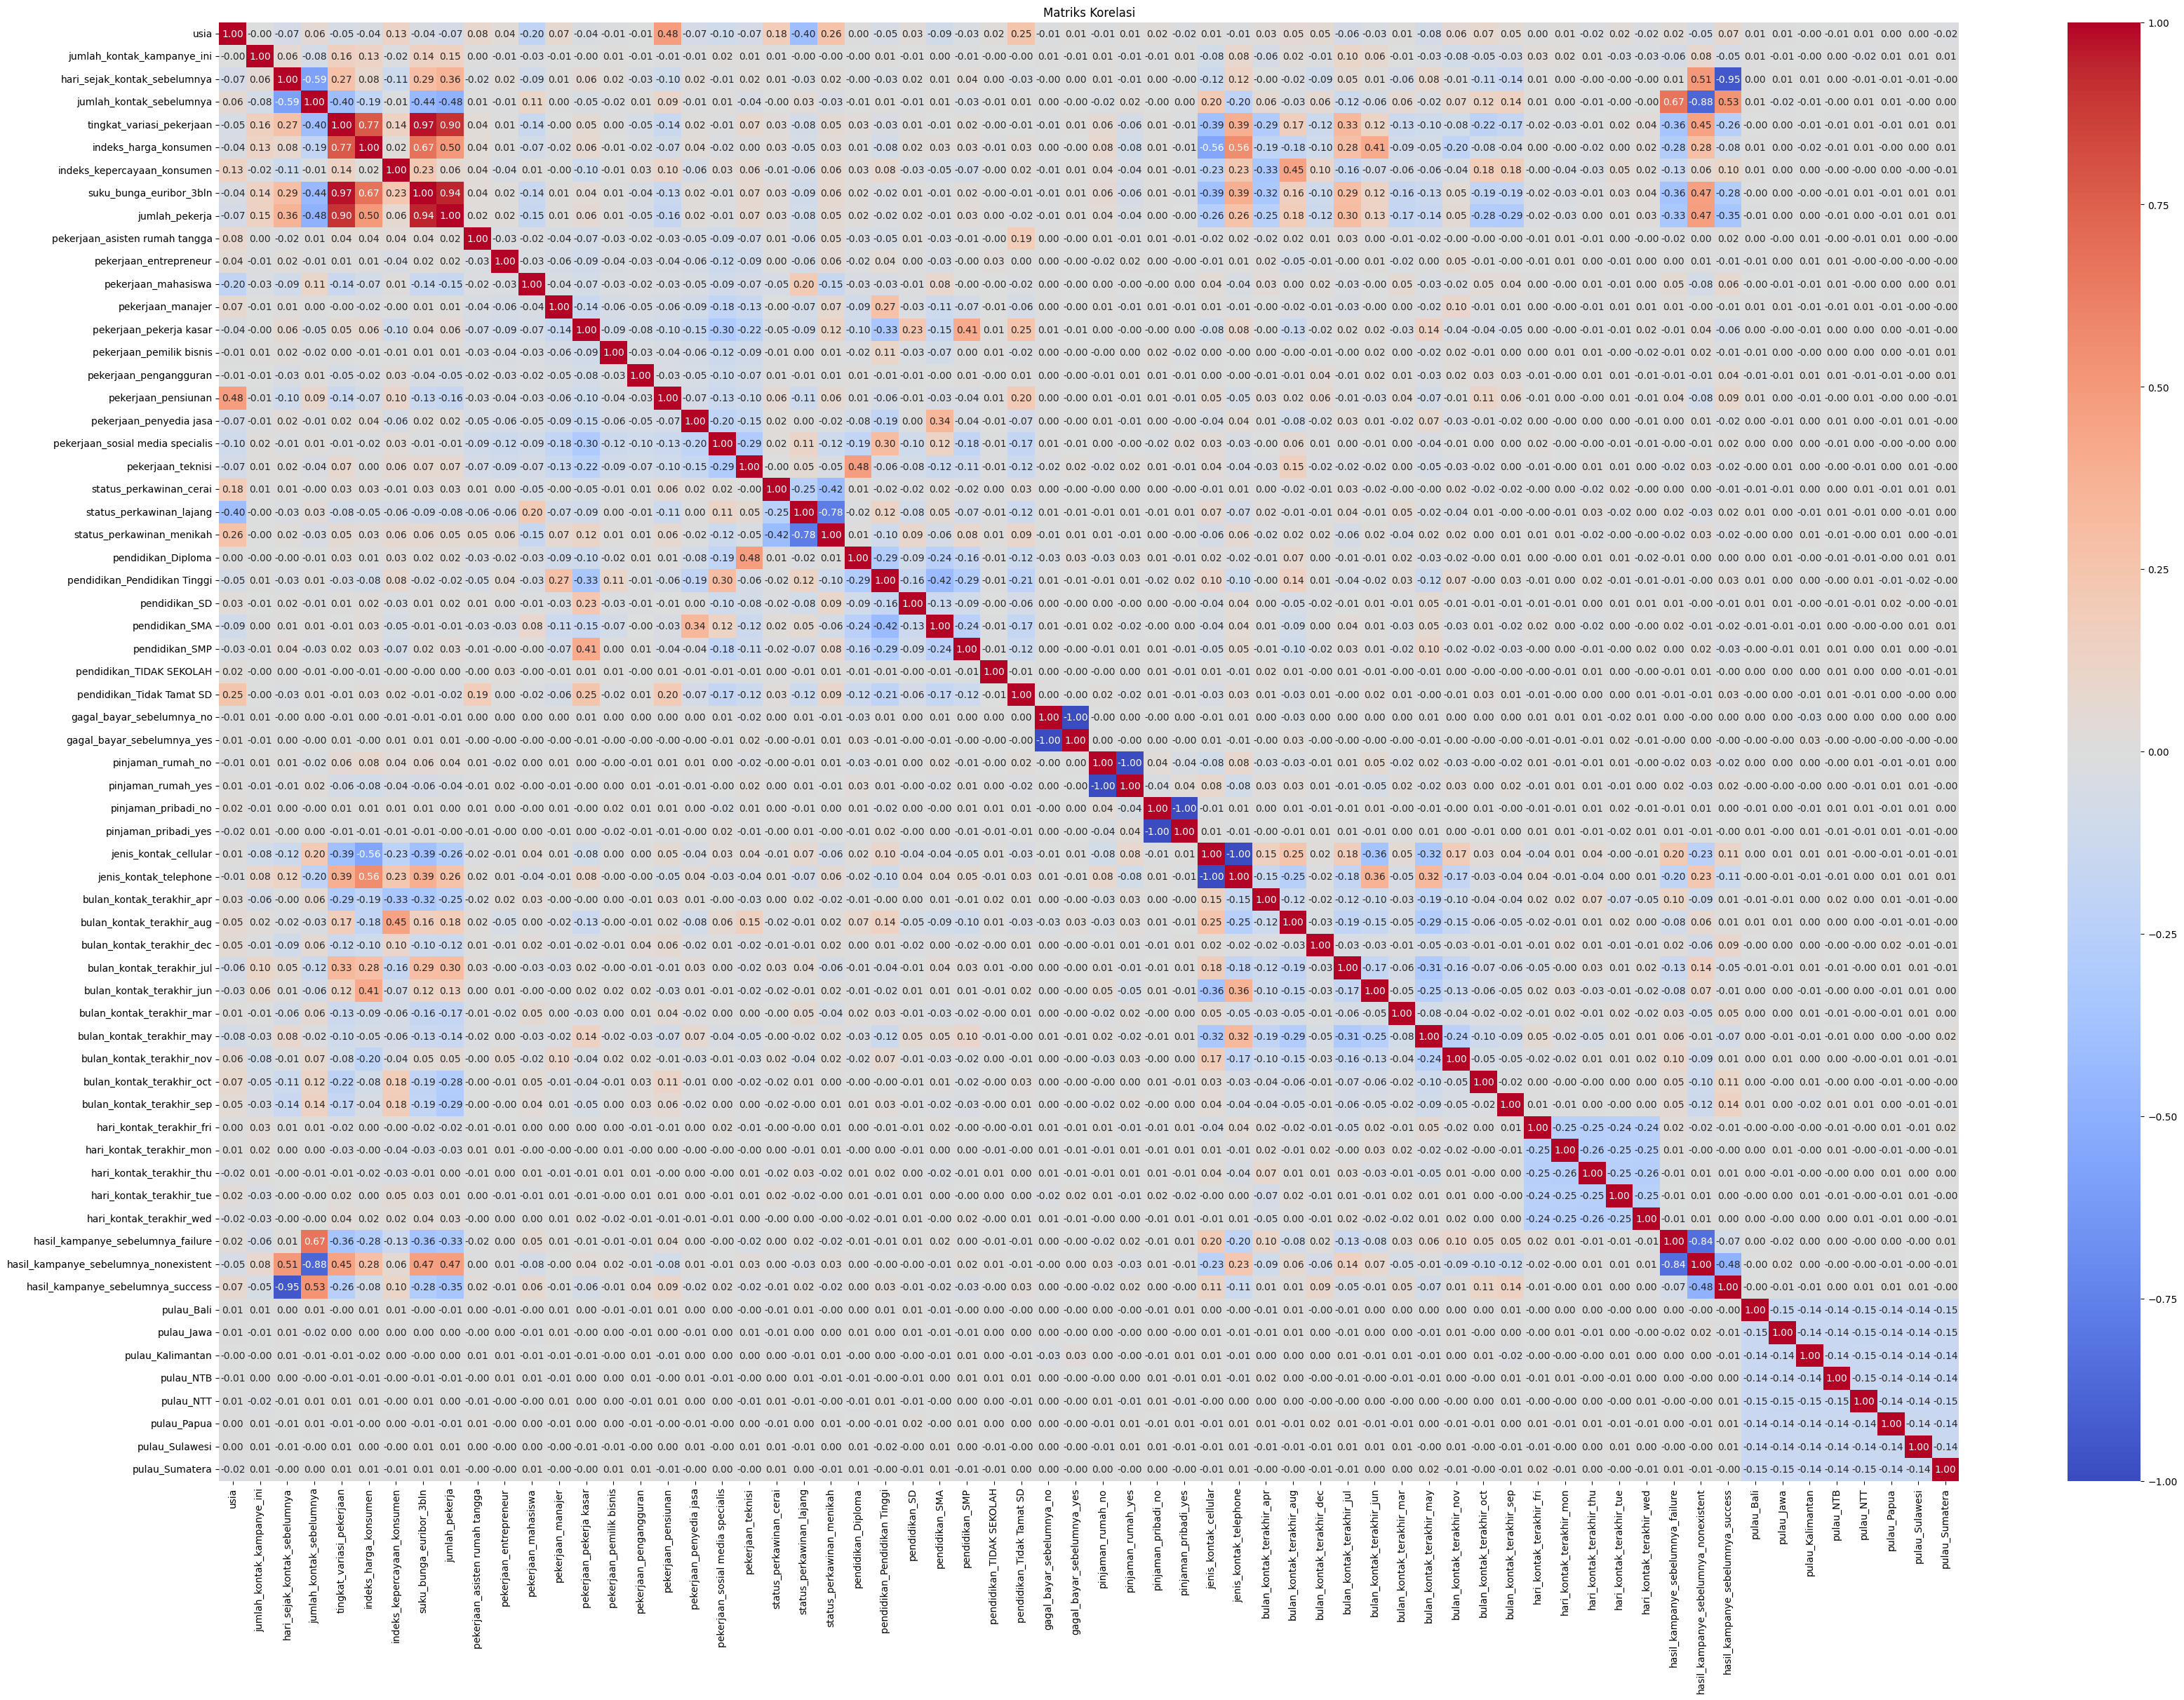

In [19]:
plt.figure(figsize=(40, 27))
sns.heatmap(X.corr(), fmt=".2f", cmap="coolwarm", annot=True)
plt.title("Matriks Korelasi")

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(13558, 3390, 13558, 3390)

In [21]:
value_counts = y_train.value_counts()
value_counts

,count
berlangganan_deposito,
0,11852
1,1706


In [22]:
models = {
    "Random_Forest" : RandomForestClassifier(class_weight="balanced"),
    "XGB": XGBClassifier(),
    "Logistic_Regression" : LogisticRegression(class_weight="balanced")
}

y_preds = {}

for nama_model, model in models.items():
  model.fit(X_train, y_train)
  y_preds[nama_model] = model.predict(X_val)

In [23]:
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred)
  model_results = {
      "Accuracy" : model_accuracy,
      "Precision" : precision,
      "Recall" : recall,
      "f1_score" : f1_score
  }
  return model_results

In [24]:
rf_result = calculate_results(y_val, y_preds["Random_Forest"])
rf_result

{'Accuracy': 0.8820058997050148,
 'Precision': array([0.8969621 , 0.63959391]),
 'Recall': array([0.9758092 , 0.27692308]),
 'f1_score': array([0.93472585, 0.38650307])}

In [25]:
xgb_result = calculate_results(y_val, y_preds["XGB"])
xgb_result

{'Accuracy': 0.8808259587020649,
 'Precision': array([0.90161853, 0.60669456]),
 'Recall': array([0.96797274, 0.31868132]),
 'f1_score': array([0.93361814, 0.41786744])}

In [26]:
lr_result = calculate_results(y_val, y_preds["Logistic_Regression"])
lr_result

{'Accuracy': 0.8147492625368732,
 'Precision': array([0.94178476, 0.38896021]),
 'Recall': array([0.83781942, 0.66593407]),
 'f1_score': array([0.88676524, 0.4910859 ])}

In [27]:
rf_y_pred_probs = models["Random_Forest"].predict_proba(X_val)[:, 1]

threshold = 0.5

y_preds = (rf_y_pred_probs >= threshold).astype(int)
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2935
           1       0.64      0.28      0.39       455

    accuracy                           0.88      3390
   macro avg       0.77      0.63      0.66      3390
weighted avg       0.86      0.88      0.86      3390



In [28]:
average_precision = average_precision_score(y_val, rf_y_pred_probs)

print(f'average precision (AUC-PR) : {average_precision:.2f}')

average precision (AUC-PR) : 0.48


In [29]:
xgb_y_pred_probs = models["XGB"].predict_proba(X_val)[:, 1]

xgb_threshold = 0.5

xgb_y_preds = (xgb_y_pred_probs >= xgb_threshold).astype(int)
print(classification_report(y_val, xgb_y_preds))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2935
           1       0.61      0.32      0.42       455

    accuracy                           0.88      3390
   macro avg       0.75      0.64      0.68      3390
weighted avg       0.86      0.88      0.86      3390



In [30]:
average_precision = average_precision_score(y_val, xgb_y_pred_probs)

print(f'average precision (AUC-PR) : {average_precision:.2f}')

average precision (AUC-PR) : 0.46


In [31]:
lr_y_pred_probs = models["Logistic_Regression"].predict_proba(X_val)[:, 1]

lr_threshold = 0.5

lr_y_preds = (lr_y_pred_probs >= lr_threshold).astype(int)
print(classification_report(y_val, lr_y_preds))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2935
           1       0.39      0.67      0.49       455

    accuracy                           0.81      3390
   macro avg       0.67      0.75      0.69      3390
weighted avg       0.87      0.81      0.83      3390



In [32]:
average_precision = average_precision_score(y_val, lr_y_pred_probs)

print(f'average precision (AUC-PR) : {average_precision:.2f}')

average precision (AUC-PR) : 0.48


In [41]:
y_val.value_counts(), len(y_val)

(berlangganan_deposito
 0    2935
 1     455
 Name: count, dtype: int64,
 3390)

### Tuning hyperparameter

model yang akan dilanjutkan untuk tuning hyperparameter adalah XGB karena memiliki precision dan recall yang seimbang dibandingkan 2 model lainnya

In [34]:
xgb_param = {
    "n_estimators": [10, 50, 1000],
    "max_depth": [None, 3, 5, 10],
    "min_child_weight": np.arange(1, 20, 2),
    "colsample_bytree": [0.6, 0.8, 1.0],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [0.1, 1, 10]
}

In [42]:
np.random.seed(42)

rs_xgb = RandomizedSearchCV(estimator=XGBClassifier(scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)),
                            param_distributions=xgb_param,
                            n_iter=50,
                            cv=5,
                            scoring='average_precision',
                            verbose=True)

rs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [None, 3, 5, 10],
                                        'min_child_weight': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': [10, 50, 1000],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [0.1, 1, 10]},
                   scoring='average_precision', verbose=True)

In [43]:
rs_xgb.best_params_

{'reg_lambda': 1,
 'reg_alpha': 1,
 'n_estimators': 50,
 'min_child_weight': np.int64(13),
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [44]:
rs_xgb.best_score_

np.float64(0.4720466560126978)

In [45]:
rs_xgb_y_pred_probs = rs_xgb.predict_proba(X_val)[:, 1]
rs_xgb_threshold = np.arange(0.0, 1.0, 0.01)

rs_xgb_f1_scores = []

for th in rs_xgb_threshold:
  rs_xgb_y_preds = (rs_xgb_y_pred_probs >= th).astype(int)
  skor_f1 = f1_score(y_val, rs_xgb_y_preds)
  rs_xgb_f1_scores.append(skor_f1)

rs_xgb_best_threshold = rs_xgb_threshold[np.argmax(rs_xgb_f1_scores)]
rs_xgb_best_f1 = max(rs_xgb_f1_scores)

print(f"Best Threshold : {rs_xgb_best_threshold} and Best_F1_Score : {rs_xgb_best_f1}")

Best Threshold : 0.61 and Best_F1_Score : 0.5399811853245532


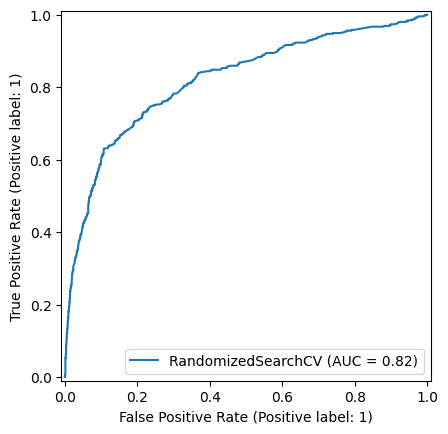

In [46]:
RocCurveDisplay.from_estimator(rs_xgb, X_val, y_val)

In [50]:
gs_xgb_param = {
 'reg_lambda': [1],
 'reg_alpha': [1],
 'n_estimators': [50, 100],
 'min_child_weight': [12, 13, 14],
 'max_depth': [2, 3, 4],
 'learning_rate': [0.05, 0.1, 0.2],
 'colsample_bytree': [0.5, 0.6, 0.7]}

In [51]:
gs_xgb = GridSearchCV(estimator=XGBClassifier(scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)),
                      param_grid=gs_xgb_param,
                      cv=5,
                      scoring='average_precision',
                      verbose=True)

gs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'min_child_weight': [12, 13, 14],
                         'n_estimators': [50, 100], 'reg_alpha': [1],
                         'reg_lambda': [1]},
             scoring='average_precision', verbose=True)

In [52]:
gs_xgb.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 14,
 'n_estimators': 100,
 'reg_alpha': 1,
 'reg_lambda': 1}

In [53]:
gs_xgb.best_score_

np.float64(0.4778856235504697)

In [54]:
gs_xgb_y_pred_probs = gs_xgb.predict_proba(X_val)[:, 1]
gs_xgb_threshold = np.arange(0.0, 1.0, 0.01)

gs_xgb_f1_scores = []

for th in gs_xgb_threshold:
  gs_xgb_y_preds = (gs_xgb_y_pred_probs >= th).astype(int)
  skor_f1 = f1_score(y_val, gs_xgb_y_preds)
  gs_xgb_f1_scores.append(skor_f1)

gs_xgb_best_threshold = gs_xgb_threshold[np.argmax(gs_xgb_f1_scores)]
gs_xgb_best_f1 = max(gs_xgb_f1_scores)

print(f"Best Threshold : {gs_xgb_best_threshold} and Best_F1_Score : {gs_xgb_best_f1}")

Best Threshold : 0.66 and Best_F1_Score : 0.5512437810945273


In [56]:
final_gs_threshold = 0.66

gs_preds = (gs_xgb_y_pred_probs >= final_gs_threshold).astype(int)
gs_avg_precision = average_precision_score(y_val, gs_xgb_y_pred_probs)
gs_results = calculate_results(y_val, gs_preds)
print(f"Average Precision GS_Model (AUC-PR) : {gs_avg_precision:.3f}\nInformasi Model : {gs_results}")

Average Precision GS_Model (AUC-PR) : 0.508
Informasi Model : {'Accuracy': 0.8669616519174042, 'Precision': array([0.93732394, 0.50363636]), 'Recall': array([0.90698467, 0.60879121]), 'f1_score': array([0.92190476, 0.55124378])}


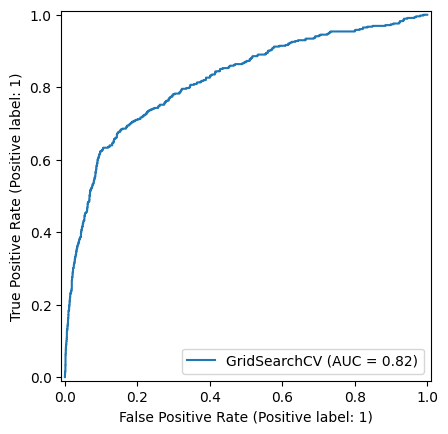

In [57]:
RocCurveDisplay.from_estimator(gs_xgb, X_val, y_val)

### Cek feature importance pada model

In [58]:
best_xgb = gs_xgb.best_estimator_

koef = best_xgb.feature_importances_

gs_xgb_importance = pd.DataFrame({"columns" : X_train.columns,
                                  "koef" : koef}).sort_values("koef", ascending=False)

gs_xgb_importance = gs_xgb_importance[gs_xgb_importance["koef"] >= koef.mean()]
gs_xgb_importance

,columns,koef
8,jumlah_pekerja,0.285001
4,tingkat_variasi_pekerjaan,0.100957
44,bulan_kontak_terakhir_may,0.080562
7,suku_bunga_euribor_3bln,0.049955
6,indeks_kepercayaan_konsumen,0.041643
46,bulan_kontak_terakhir_oct,0.035106
2,hari_sejak_kontak_sebelumnya,0.034280
38,bulan_kontak_terakhir_apr,0.031735
42,bulan_kontak_terakhir_jun,0.028835
55,hasil_kampanye_sebelumnya_success,0.022610


In [59]:
new_col = gs_xgb_importance["columns"].unique()
new_col

array(['jumlah_pekerja', 'tingkat_variasi_pekerjaan',
       'bulan_kontak_terakhir_may', 'suku_bunga_euribor_3bln',
       'indeks_kepercayaan_konsumen', 'bulan_kontak_terakhir_oct',
       'hari_sejak_kontak_sebelumnya', 'bulan_kontak_terakhir_apr',
       'bulan_kontak_terakhir_jun', 'hasil_kampanye_sebelumnya_success',
       'jenis_kontak_cellular'], dtype=object)

In [60]:
new_X = X[new_col]
new_X

,jumlah_pekerja,tingkat_variasi_pekerjaan,bulan_kontak_terakhir_may,suku_bunga_euribor_3bln,indeks_kepercayaan_konsumen,bulan_kontak_terakhir_oct,hari_sejak_kontak_sebelumnya,bulan_kontak_terakhir_apr,bulan_kontak_terakhir_jun,hasil_kampanye_sebelumnya_success,jenis_kontak_cellular
0,0.105860,0.354167,0.0,0.056903,0.439331,0.0,1.000000,0.0,0.0,0.0,1.0
1,0.877883,0.687500,0.0,0.767853,0.368201,0.0,1.000000,0.0,0.0,0.0,1.0
2,1.000000,1.000000,0.0,0.980277,0.338912,0.0,1.000000,0.0,0.0,0.0,1.0
3,0.859735,0.937500,1.0,0.957833,0.602510,0.0,1.000000,0.0,0.0,0.0,0.0
4,1.000000,1.000000,0.0,0.981637,0.615063,0.0,1.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
22908,1.000000,1.000000,0.0,0.981410,0.615063,0.0,1.000000,0.0,0.0,0.0,1.0
22910,0.000000,0.479167,0.0,0.055543,0.556485,0.0,0.009009,0.0,0.0,0.0,1.0
22911,1.000000,1.000000,0.0,0.982317,0.615063,0.0,1.000000,0.0,0.0,0.0,1.0
22912,0.000000,0.479167,0.0,0.055770,0.556485,0.0,1.000000,0.0,0.0,0.0,0.0


In [61]:
new_X_train, new_X_val, new_y_train, new_y_val = train_test_split(new_X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=42)

len(new_X_train), len(new_y_train), len(new_X_val), len(new_y_val)

(13558, 13558, 3390, 3390)

In [62]:
new_rs_xgb = RandomizedSearchCV(estimator=XGBClassifier(scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)),
                               param_distributions=xgb_param,
                               n_iter=50,
                               scoring="average_precision",
                               cv=5,
                               verbose=True)

new_rs_xgb.fit(new_X_train, new_y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [None, 3, 5, 10],
                                        'min_child_weight': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': [10, 50, 1000],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [0.1, 1, 10]},
                   scoring='average_precision', verbose=True)

In [63]:
new_rs_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=np.int64(17), missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [64]:
new_rs_xgb.best_params_

{'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 1000,
 'min_child_weight': np.int64(17),
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.6}

In [65]:
new_rs_xgb.best_score_

np.float64(0.4622872356699907)

In [66]:
new_rs_xgb_y_pred_probs = new_rs_xgb.predict_proba(new_X_val)[:, 1]
new_rs_xgb_threshold = np.arange(0.0, 1.0, 0.01)

new_rs_xgb_f1_scores = []

for th in new_rs_xgb_threshold:
  new_rs_xgb_y_preds = (new_rs_xgb_y_pred_probs >= th).astype(int)
  skor_f1 = f1_score(y_val, new_rs_xgb_y_preds)
  new_rs_xgb_f1_scores.append(skor_f1)

new_rs_xgb_best_threshold = new_rs_xgb_threshold[np.argmax(new_rs_xgb_f1_scores)]
new_rs_xgb_best_f1 = max(new_rs_xgb_f1_scores)

print(f"Best Threshold : {new_rs_xgb_best_threshold} and Best_F1_Score : {new_rs_xgb_best_f1}")

Best Threshold : 0.6900000000000001 and Best_F1_Score : 0.5414585414585414


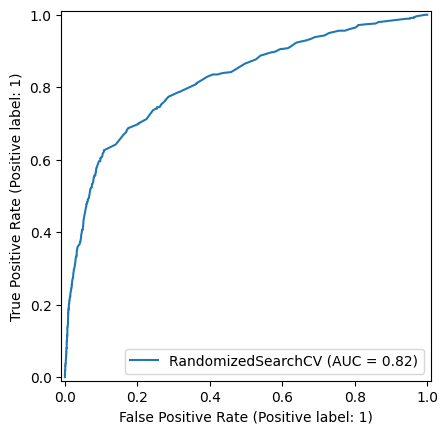

In [67]:
RocCurveDisplay.from_estimator(new_rs_xgb, new_X_val, new_y_val)

In [68]:
new_gs_xgb_param = {
 'reg_lambda': [1],
 'reg_alpha': [0],
 'n_estimators': [50, 1000],
 'min_child_weight': [16, 17, 18],
 'max_depth': [4, 5, 6],
 'learning_rate': [0.005, 0.01, 0.01],
 'colsample_bytree': [0.5, 0.6, 0.7]
}

In [69]:
new_gs_xgb = GridSearchCV(estimator=XGBClassifier(scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)),
                         param_grid=new_gs_xgb_param,
                         scoring="average_precision",
                         cv=5,
                         verbose=True)

new_gs_xgb.fit(new_X_train, new_y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.6, 0.7],
                         'learning_rate': [0.005, 0.01, 0.01],
                         'max_depth': [4, 5, 6],
                         'min_child_weight': [16, 17, 18],
                         'n_estimators': [50, 1000], 'reg_alpha': [0],
                         'reg_lambda': [1]},
             scoring='average_precision', verbose=True)

In [70]:
new_gs_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=18, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
new_gs_xgb.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.005,
 'max_depth': 6,
 'min_child_weight': 18,
 'n_estimators': 1000,
 'reg_alpha': 0,
 'reg_lambda': 1}

In [72]:
new_gs_xgb.best_score_

np.float64(0.46535314234363706)

In [73]:
new_gs_xgb_y_pred_probs = new_gs_xgb.predict_proba(new_X_val)[:, 1]
new_gs_xgb_threshold = np.arange(0.0, 1.0, 0.01)

new_gs_xgb_f1_scores = []

for th in new_gs_xgb_threshold:
  new_gs_xgb_y_preds = (new_gs_xgb_y_pred_probs >= th).astype(int)
  skor_f1 = f1_score(y_val, new_gs_xgb_y_preds)
  new_gs_xgb_f1_scores.append(skor_f1)

new_gs_xgb_best_threshold = new_gs_xgb_threshold[np.argmax(new_gs_xgb_f1_scores)]
new_gs_xgb_best_f1 = max(new_gs_xgb_f1_scores)

print(f"Best Threshold : {new_gs_xgb_best_threshold} and Best_F1_Score : {new_gs_xgb_best_f1}")

Best Threshold : 0.67 and Best_F1_Score : 0.5405940594059406


In [74]:
final_new_gs_threshold = 0.67

new_gs_preds = (new_gs_xgb_y_pred_probs >= final_new_gs_threshold).astype(int)
new_gs_avg_precision = average_precision_score(y_val, new_gs_xgb_y_pred_probs)
new_gs_results = calculate_results(y_val, new_gs_preds)
print(f"Average Precision GS_Model (AUC-PR) : {new_gs_avg_precision:.3f}\nInformasi Model : {new_gs_results}")

Average Precision GS_Model (AUC-PR) : 0.503
Informasi Model : {'Accuracy': 0.8631268436578171, 'Precision': array([0.93580247, 0.49189189]), 'Recall': array([0.90391823, 0.6       ]), 'f1_score': array([0.91958406, 0.54059406])}


## Bandingkan antara masing-masing model
- model rs_xgb (random search sebelum feature engineering), Best Threshold : 0.61 and Best_F1_Score : 0.5399811853245532

- model gs_xgb (grid search sebelum feature engineering), Best Threshold : 0.66 and Best_F1_Score : 0.5512437810945273

- model new_rs_xgb (random search sesudah feature engineering), Best Threshold : 0.6900000000000001 and Best_F1_Score : 0.5414585414585414

- model new_gs_xgb (grid search sesudah feature engineering), Best Threshold : 0.67 and Best_F1_Score : 0.5405940594059406

### Confusion matrix dari model terbaik

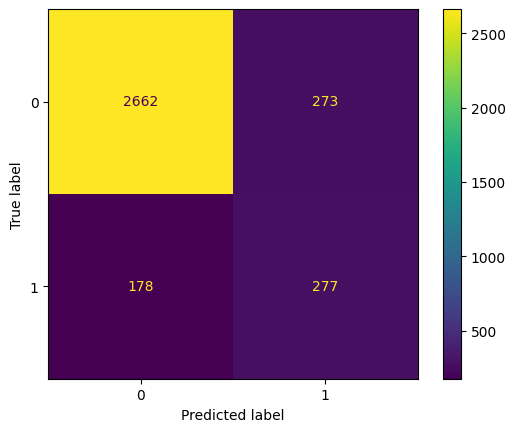

In [79]:
conf_mat = confusion_matrix(y_val, gs_preds)
display = ConfusionMatrixDisplay(conf_mat, display_labels=gs_xgb.best_estimator_.classes_)
display.plot()

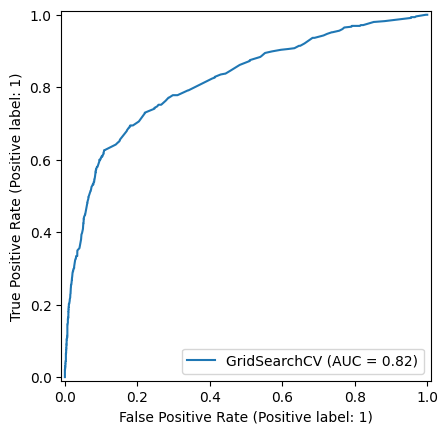

In [76]:
RocCurveDisplay.from_estimator(new_gs_xgb, new_X_val, new_y_val)

## Prediksi validation_dataset

In [118]:
test_data = pd.read_csv("validation_set.csv")
test_data

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NTB
5727,612330,60,teknisi,menikah,Diploma,unknown,no,no,telephone,jul,...,15,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,Papua


In [119]:
test_data.isna().sum()

,0
customer_number,0
usia,0
pekerjaan,0
status_perkawinan,0
pendidikan,0
gagal_bayar_sebelumnya,0
pinjaman_rumah,0
pinjaman_pribadi,0
jenis_kontak,0
bulan_kontak_terakhir,0


In [120]:
(test_data == "").sum()

,0
customer_number,0
usia,0
pekerjaan,0
status_perkawinan,0
pendidikan,0
gagal_bayar_sebelumnya,0
pinjaman_rumah,0
pinjaman_pribadi,0
jenis_kontak,0
bulan_kontak_terakhir,0


In [121]:
(test_data == "unknown").sum()

,0
customer_number,0
usia,0
pekerjaan,49
status_perkawinan,9
pendidikan,218
gagal_bayar_sebelumnya,1207
pinjaman_rumah,125
pinjaman_pribadi,125
jenis_kontak,0
bulan_kontak_terakhir,0


In [122]:
all_col = [col for col in test_data.columns]
test_data = test_data[test_data[all_col] != "unknown"]
test_data

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,NaN,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,NaN,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,NaN,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NTB
5727,612330,60,teknisi,menikah,Diploma,NaN,no,no,telephone,jul,...,15,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,Papua


In [123]:
test_data = test_data.dropna()
test_data

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
6,434084,32,sosial media specialis,lajang,SMA,no,no,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,Papua
8,159684,61,pensiunan,cerai,Pendidikan Tinggi,no,yes,no,cellular,apr,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.384,5099.1,Kalimantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,214452,27,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,no,cellular,apr,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.392,5099.1,Sulawesi
5723,588935,38,pemilik bisnis,cerai,SMP,no,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Papua
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi


In [124]:
cust_num = test_data["customer_number"]
test_data = test_data.drop("customer_number", axis=1)
test_data

,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
3,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,tue,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,45,teknisi,cerai,SMA,no,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
6,32,sosial media specialis,lajang,SMA,no,no,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,Papua
8,61,pensiunan,cerai,Pendidikan Tinggi,no,yes,no,cellular,apr,tue,2,999,0,nonexistent,-1.8,93.075,-47.1,1.384,5099.1,Kalimantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,27,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,no,cellular,apr,mon,1,999,0,nonexistent,-1.8,93.075,-47.1,1.392,5099.1,Sulawesi
5723,38,pemilik bisnis,cerai,SMP,no,yes,no,telephone,may,tue,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Papua
5724,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,tue,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,fri,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi


In [125]:
test_transformed_num = min_max.transform(test_data[num_col])
test_transformed_num = pd.DataFrame(test_transformed_num,
                                    columns=min_max.get_feature_names_out(),
                                    index=test_data.index)
test_transformed_num

,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja
0,0.2125,0.000000,1.0,0.0,1.000000,0.669135,0.338912,0.980730,1.000000
3,0.4125,0.047619,1.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735
4,0.3375,0.000000,1.0,0.2,0.333333,0.269680,0.192469,0.157107,0.512287
6,0.1750,0.000000,1.0,0.0,1.000000,0.882307,0.376569,0.958966,1.000000
8,0.5375,0.023810,1.0,0.0,0.333333,0.340608,0.154812,0.170029,0.512287
...,...,...,...,...,...,...,...,...,...
5722,0.1125,0.000000,1.0,0.0,0.333333,0.340608,0.154812,0.171843,0.512287
5723,0.2500,0.047619,1.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735
5724,0.4125,0.000000,1.0,0.0,1.000000,0.882307,0.376569,0.980957,1.000000
5725,0.1500,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735


In [126]:
test_data = test_data.drop(num_col, axis=1)
test_data= test_data.join(test_transformed_num)
test_data

,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,hasil_kampanye_sebelumnya,pulau,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja
0,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,mon,nonexistent,Jawa,0.2125,0.000000,1.0,0.0,1.000000,0.669135,0.338912,0.980730,1.000000
3,pengangguran,menikah,Diploma,no,no,no,telephone,may,tue,nonexistent,Sumatera,0.4125,0.047619,1.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735
4,teknisi,cerai,SMA,no,yes,no,cellular,may,thu,failure,Sumatera,0.3375,0.000000,1.0,0.2,0.333333,0.269680,0.192469,0.157107,0.512287
6,sosial media specialis,lajang,SMA,no,no,no,telephone,jun,wed,nonexistent,Papua,0.1750,0.000000,1.0,0.0,1.000000,0.882307,0.376569,0.958966,1.000000
8,pensiunan,cerai,Pendidikan Tinggi,no,yes,no,cellular,apr,tue,nonexistent,Kalimantan,0.5375,0.023810,1.0,0.0,0.333333,0.340608,0.154812,0.170029,0.512287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,no,cellular,apr,mon,nonexistent,Sulawesi,0.1125,0.000000,1.0,0.0,0.333333,0.340608,0.154812,0.171843,0.512287
5723,pemilik bisnis,cerai,SMP,no,yes,no,telephone,may,tue,nonexistent,Papua,0.2500,0.047619,1.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735
5724,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,tue,nonexistent,Kalimantan,0.4125,0.000000,1.0,0.0,1.000000,0.882307,0.376569,0.980957,1.000000
5725,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,fri,nonexistent,Sulawesi,0.1500,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735


In [127]:
test_transformed_cat= one_hot.transform(test_data[cat_col])
test_transformed_cat= pd.DataFrame(test_transformed_cat,
                                   columns=one_hot.get_feature_names_out(),
                                   index=test_data.index)
X_transformed_cat

,pekerjaan_asisten rumah tangga,pekerjaan_entrepreneur,pekerjaan_mahasiswa,pekerjaan_manajer,pekerjaan_pekerja kasar,pekerjaan_pemilik bisnis,pekerjaan_pengangguran,pekerjaan_pensiunan,pekerjaan_penyedia jasa,pekerjaan_sosial media specialis,...,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success,pulau_Bali,pulau_Jawa,pulau_Kalimantan,pulau_NTB,pulau_NTT,pulau_Papua,pulau_Sulawesi,pulau_Sumatera
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22910,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22912,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
test_data = test_data.drop(cat_col, axis=1)
test_data = test_data.join(X_transformed_cat)
test_data

,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pekerjaan_asisten rumah tangga,...,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success,pulau_Bali,pulau_Jawa,pulau_Kalimantan,pulau_NTB,pulau_NTT,pulau_Papua,pulau_Sulawesi,pulau_Sumatera
0,0.2125,0.000000,1.0,0.0,1.000000,0.669135,0.338912,0.980730,1.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.4125,0.047619,1.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.3375,0.000000,1.0,0.2,0.333333,0.269680,0.192469,0.157107,0.512287,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.1750,0.000000,1.0,0.0,1.000000,0.882307,0.376569,0.958966,1.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.5375,0.023810,1.0,0.0,0.333333,0.340608,0.154812,0.170029,0.512287,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,0.1125,0.000000,1.0,0.0,0.333333,0.340608,0.154812,0.171843,0.512287,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5723,0.2500,0.047619,1.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5724,0.4125,0.000000,1.0,0.0,1.000000,0.882307,0.376569,0.980957,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5725,0.1500,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.956926,0.859735,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [129]:
test_pred_probs = gs_xgb.predict_proba(test_data)[:, 1]
test_pred_probs[:10], len(test_pred_probs)

(array([0.3298244 , 0.21399584, 0.42782012, 0.37643167, 0.7548532 ,
        0.34238318, 0.55549306, 0.8628272 , 0.18992975, 0.3162282 ],
       dtype=float32),
 4253)

In [130]:
cust_num

,customer_number
0,445420
3,816820
4,542716
6,434084
8,159684
...,...
5722,214452
5723,588935
5724,782072
5725,116371


In [131]:
test_preds = pd.DataFrame({"customer_number" : cust_num.to_list(),
                           "berlangganan_deposito" : test_pred_probs})
test_preds

,customer_number,berlangganan_deposito
0,445420,0.329824
1,816820,0.213996
2,542716,0.427820
3,434084,0.376432
4,159684,0.754853
...,...,...
4248,214452,0.552518
4249,588935,0.298946
4250,782072,0.773216
4251,116371,0.332020


In [133]:
test_preds.to_csv("Validation Result Submission.csv", index=False)